In [109]:
import pandas as pd

In [110]:
df = pd.read_csv(r'data/pandas_df2.csv', dtype='str')

In [111]:
# remove all non-alphanumeric characters
df['AT_MaraMatkl'].replace(r'[^a-zA-Z]', ' ', regex=True, inplace=True)

# remove single characters labels entries
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

# remove uneccessary spaces
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: ' '.join(x.split()))

# lower case
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: x.lower())

In [112]:
df['AT_MaraMatkl']

0                 customized screws
1            xxx do not use anymore
2          printed material general
3            injected parts general
4                   idc idc jumpers
                     ...           
1219901     electronics ems general
1219902     electronics ems general
1219903     electronics ems general
1219904     electronics ems general
1219905                       dummy
Name: AT_MaraMatkl, Length: 1219906, dtype: object

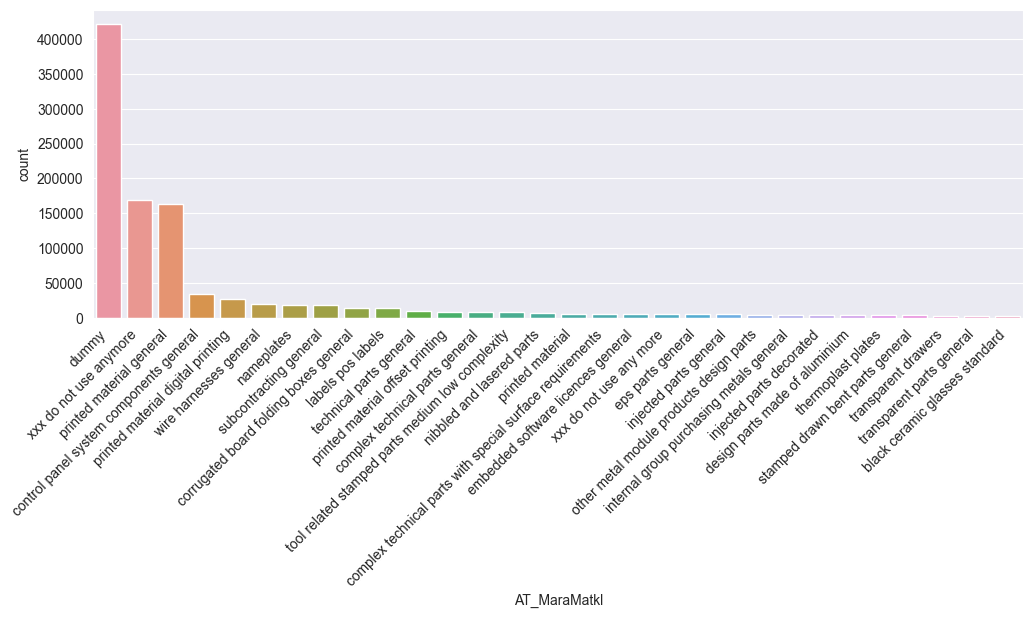

In [113]:
# plot the distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df['AT_MaraMatkl'], order=pd.value_counts(df['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

